### <br><b> Introduction to data analysis_TP1</b>

-->This document can't be modified. You don't have the authority to save changes to this notebook. ***So be sure you download your work before exiting!***  (use the above **download** buttun)

Most optical sensors have two defects: 1) a *"thermal"* noise like many other sensors, and 2) a non-zero level even when they are black, which calls *"dark current"*. We will try to measure this level on the cameras of your cell phones.

Our objective here is to introduce you to numppy, matplotlib packages:
- Numpy library adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays (eg. max/min, mean, standard deviation). 
- And matplotlib library allows to create static, animated, and interactive visualizations in Python

<br><b>Tasks:</b>
> 1 - Take a photo by obstructing the lens of your mobile phone as best as possible and transfer the file to your computer (by email or otherwise). In jupyter, use "upload" to transfer your image to "/Data/Photo" file in your notebook space.
<br><br>2 - Open the image as laid later on 
<br><br>3 -plot the data with the plot command of matplotlib (find its use on the internet). Note that due to the "import maplotlib.pyplot as plt" command, you will have prefix "plt." for all matplotlib commands. In some examples on the internet you might encounter a different prefix or even sometimes no prefix. These examples will have to be adapted ...
<br><br>4 -Select a region of your photo, change its color and copy paste some objects within the photo (for black)
<br><br>5 - with numpy, calculate the min, max and median values, the mean and the standard deviation. Same remark as above, because of the command "import numpy as "np", it will be necessary to have prefix "np. » for all numpy commands.
<br><br>5 - Does your camera have a non-zero "dark currnet"? (for black)
<br><br>6 - plot the histogram with matplotlib. Choose the limits (look for the doc on the internet) to see what happens close to 0.
<br><br>7 - To go further: with numpy calculate the% of values = 0, and the% of values <= 1
<br><br>8 - Increase the luminosity of the photo and display it using the function imshow. How do you interpret white pixels in the output ?
<br><br>9 - Determine the average grain size using :
    <br>  a) autocorrelation functions from the statsmodel package
    <br>  b) Fourier transforms from numpy.fft
<br><br>10 - Is there a qualitative difference between the horizontal and vertical length scales ?


 



    

### >> <b> Load Libraries</b>
First step is to import all libraries that will be used!

In [1]:
# to render your plots in your notebook %matplotlib inline 
%matplotlib inline 
import matplotlib.pyplot as plt # for plots 
import numpy as np
import imageio as im # to read image data

## >> <b> Let's get started </b>
###  <b> Colored photo </b>

#### <b>1)  Import your image </b>
For that we will use **imageio** library, and function imread
<br><b> /!\ </b> Do not forget to change the path/name of the photo ^^

In [2]:
img=im.imread('~/TP_master/Data/Photo/oscar.jpeg',pilmode="RGB")

#### <b> 2) PLot the image </b>


Text(0.5, 1.0, "Hey it's Oscar *_*")

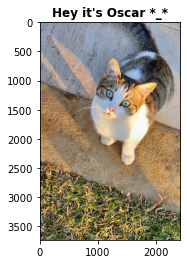

In [3]:
plt.imshow(img)
plt.title("Hey it's Oscar *_*",fontweight='bold')

#### <b> 3) Accessing Image Properties </b>
Check the shape and size of your image
<br>As you can see for BGR image, it returns an array of Blue, Green, Red values.

In [4]:
img.shape # image shape (height,width,channels)
img.size  # total number of pixels 

# To print the results:
print(img.shape)
print(img.size)

(3737, 2414, 3)
27063354


> <b>Why it's important to check the shape of the image :)</b>
 <br>If an image is grayscale, the returned array will only contain the number of rows and columns, so it is a good method to check whether the loaded image is grayscale or color. Do not hesitate to try it ^_^

<br>You can access a pixel value by its row and column coordinates:

In [5]:
px = img[100,100]
print( px )

# accessing only blue pixel
blue = img[100,100,0]
print(blue)

# accessing only blue channel
B=img[:,:,0].flatten()
print(B)

[148 159 179]
148
[144 142 142 ... 148 160 161]


> <b>Selecting </b>
>The above method is normally used for selecting a region of an array, say the first 10 rows and last 2 columns. 
> For individual pixel access, the Numpy array methods, **array.item()** and **array.itemset()** are considered better. They always return a scalar, however, so if you want to access all the B,G,R values, you will need to call **array.item()** separately for each value.

## **Let's have some fun ^_^**

- Select a region of your photo (eg: eyes)
- change the color of this region
- Select an object in the image and paste it to another region 

You may think of using **np.random.randn & np.random.radint()** for generating random numbers to get new colors ;) 

### Did you like Oscar's new eyes color
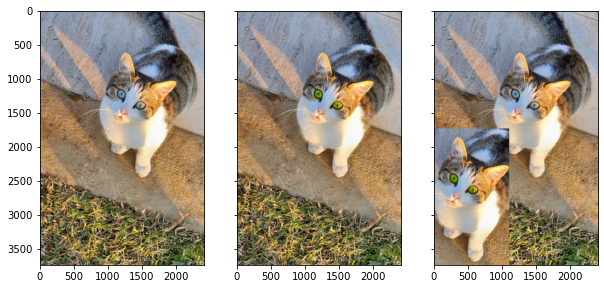

#### <b> 4) Statistical analysis </b>
For each channel:
* Calculate max,min, mean, standard deviation using numpy 
* plot the histogram with matplotlib
* Calculate the percentage of 0 for each channel

In [6]:
R,B,G= img[:,:,0],img[:,:,1],img[:,:,2]

In [7]:
# mean, max, min, std 
print('Color','mean','max','min','std')
channels=[R,B,G]
colors=['Red','Green','Blue']
for i_color,color in enumerate (channels):
    print(colors[i_color],np.mean(color).round(2),np.max(color).round(2),np.min(color).round(2),np.std(color).round(2))
    

Color mean max min std
Red 143.09 255 0 51.99
Green 130.45 255 0 46.82
Blue 110.12 255 0 54.14


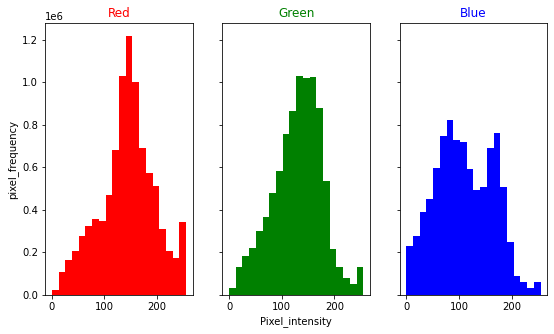

In [8]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(9,5))
for i_color,color in enumerate (channels):
    axs[i_color].hist(color.flatten(),bins=20,range=(0,255),color=colors[i_color],label=colors[i_color])
    axs[i_color].set_title(label=colors[i_color],color=colors[i_color])
    #axs[i_color].legend(loc='upper right') 
    axs[1].set_xlabel('Pixel_intensity')
    axs[0].set_ylabel('pixel_frequency')
    

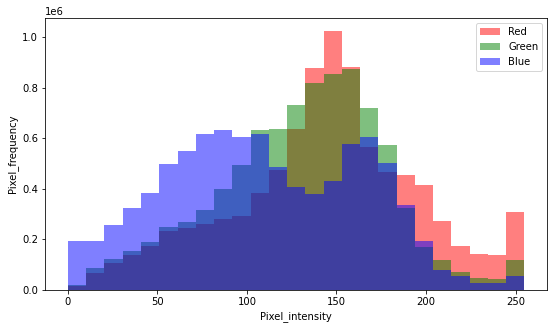

In [9]:
fig, axs = plt.subplots(ncols=1, sharey=False, figsize=(9,5))
for i_color,color in enumerate (channels):
    axs.hist(color.flatten(),bins=25,range=(0,255),color=colors[i_color],label=colors[i_color],alpha=0.5)
    axs.legend(loc='upper right')    
    axs.set_xlabel('Pixel_intensity')
    axs.set_ylabel('Pixel_frequency')

### <b>Black Photo </b>
Now as you've got the hang of using imageio, numpy, matplotlib
<br> Refer to the aforementioned Tasks at the begining, take a black photograph by your phone and go ahead with the tasks.
<br> **Don't forget the interpretation parts ;)**
<br> **And don't copy paste your colleague's report, you'll be doomed!**  

Text(0.5, 1.0, 'lightened')

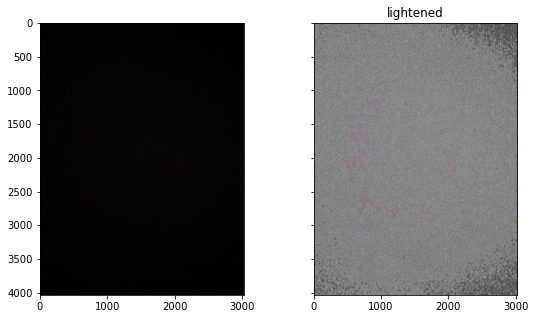

In [10]:
img=im.imread('~/TP_master/Data/Photo/JOMAA_black.jpg')
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(9,5))
axs[0].imshow(img,label='black')
plt.title('black')
axs[1].imshow(img*100)
plt.title('lightened')


In [11]:
print(img.size, img.shape)

36578304 (4032, 3024, 3)


In [12]:
R,B,G= img[:,:,0],img[:,:,1],img[:,:,2]
img[0,0,0]

2

In [13]:
print('Color','mean','max','min','std')
channels=[R,B,G]
colors=['Red','Green','Blue']
for i_color,color in enumerate (channels):
    print(colors[i_color],np.mean(color).round(2),np.max(color).round(2),np.min(color).round(2),np.std(color).round(2))
    

Color mean max min std
Red 3.45 66 0 2.2
Green 3.34 66 0 2.14
Blue 3.43 66 0 2.18


**Histogram**

It shows you all the tones in your image, from pure black on the left edge to pure white on the right edge of the histogram. The higher the graph is at a given point, the more of the tone is in the image. Therefore, a fairly dark image with lots of shadows will have a histogram that is higher on the left side (the shadows), while a fairly bright image will have a histogram that is higher on the right side (the highlights). 

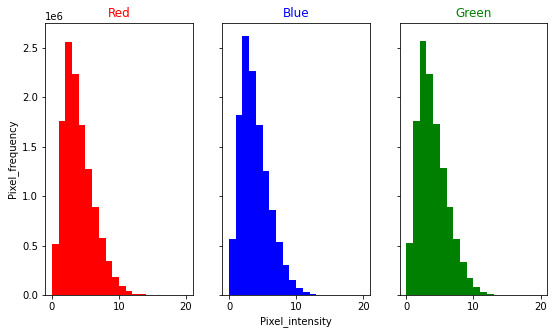

In [24]:
fig, axs = plt.subplots(ncols=3, sharey=True, figsize=(9,5))
for i_color,color in enumerate (channels):
    axs[i_color].hist(color.flatten(),bins=20,range=(0,20),color=colors[i_color],label=colors[i_color])
    axs[i_color].set_title(label=colors[i_color],color=colors[i_color])
    #axs[i_color].legend(loc='upper right') 
    axs[1].set_xlabel('Pixel_intensity')
    axs[0].set_ylabel('Pixel_frequency')
    #plt.yscale('log', nonpositive='clip')    

Technically, this histogram shows the amount of each color (or channel) in the image and if separate areas of an image are pure red, pure green, and pure blue, the left side of the histogram will also be high.

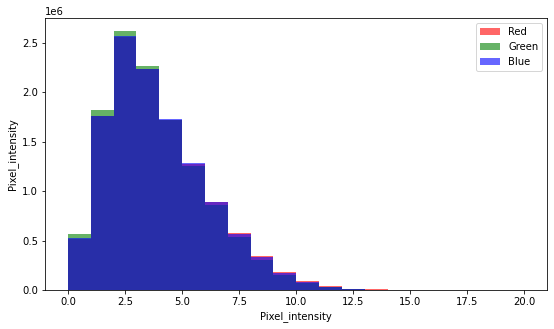

In [15]:
fig, axs = plt.subplots(ncols=1, sharey=False, figsize=(9,5))
for i_color,color in enumerate (channels):
    axs.hist(color.flatten(),bins=20,range=(0,20),color=colors[i_color],label=colors[i_color],alpha=0.6)
    axs.legend(loc='upper right')    
    axs.set_xlabel('Pixel_intensity')
    axs.set_ylabel('Pixel_intensity')

one could use log scale for the frequency (y-axis). So the frequency of such intensities  are seen obviously :)

**Percentage**


In [16]:
print('Color','Percentage','zero%','<1 %')
channels=[R,B,G]
colors=['Red','Blue','Green']
for i_color,color in enumerate (channels):
    print(colors[i_color],((color==0).mean()*100).round(2),'%',((color.flatten()<=1).mean()*100).round(2),'%')
#(len(np.where(img.flatten()==0)[0])/(img.size))*100
#(len(np.where(B.flatten()==0)[0])/(B.size))*100


Color Percentage zero% <1 %
Red 4.2 % 18.65 %
Blue 4.61 % 19.57 %
Green 4.28 % 18.76 %


**Correlation**

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

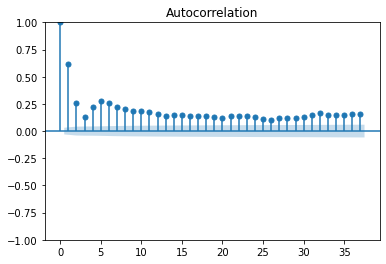

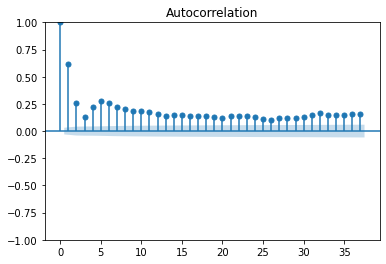

In [18]:
#plot_acf(img[:,0,0])
data=img[:,0,0]
plot_acf(data)